In [21]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [23]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [24]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1) 

X_train = X_train/255.0
X_test = X_test/255.0

In [25]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_train: ",X_test.shape)
print("Shape of Y_train: ",Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_train:  (400, 100, 100, 3)
Shape of Y_train:  (400, 1)


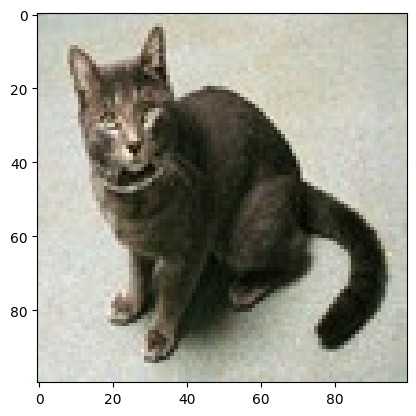

In [33]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [45]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape= (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation ='relu'),
    Dense(1, activation ='sigmoid')
])

C:\Users\SHRILAKSHMI\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
model.fit(X_train, Y_train, epochs =5, batch_size =64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5019 - loss: 0.8366
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.5961 - loss: 0.6684 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.6623 - loss: 0.6137
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7125 - loss: 0.5471
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7708 - loss: 0.4843


In [51]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6361 - loss: 0.6285 


[0.6126152873039246, 0.6499999761581421]

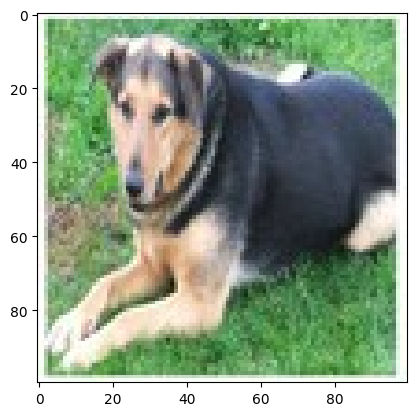

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Our model says it is:  dog


In [60]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred ==0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is: ", pred)